/tmp/ipython-input-3602900207.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking, x="PLATAFORMA_EDUCATIVA", y="Frecuencia", palette="Set2")


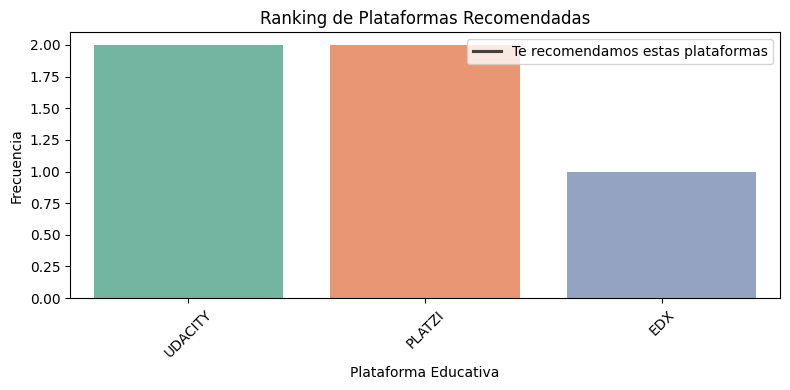

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos y limpiar columnas
df = pd.read_csv("beneficiarios.csv", sep=None, engine="python")
df.columns = df.columns.str.replace('\ufeff', '', regex=False).str.strip()

# Variables predictoras y objetivo
X = df[["EDAD", "GENERO", "DEPARTAMENTO"]]
y = df["PLATAFORMA_EDUCATIVA"]

# Preprocesamiento
preprocesador = ColumnTransformer([
    ("num", StandardScaler(), ["EDAD"]),
    ("cat", OneHotEncoder(), ["GENERO", "DEPARTAMENTO"])
])
X_proc = preprocesador.fit_transform(X)

# Modelo kNN
modelo_knn = NearestNeighbors(n_neighbors=5, metric='cosine')
modelo_knn.fit(X_proc)

# Función de recomendación
def recomendar_plataformas(edad, genero, departamento):
    nuevo = pd.DataFrame([[edad, genero.upper(), departamento.upper()]],
                         columns=["EDAD", "GENERO", "DEPARTAMENTO"])
    nuevo_proc = preprocesador.transform(nuevo)

    distancias, indices = modelo_knn.kneighbors(nuevo_proc)
    plataformas_vecinas = y.iloc[indices[0]]

    ranking = plataformas_vecinas.value_counts().reset_index()
    ranking.columns = ['PLATAFORMA_EDUCATIVA', 'Frecuencia']
    return ranking

# Gráfica
def graficar_recomendaciones(ranking):
    plt.figure(figsize=(8, 4))
    sns.barplot(data=ranking, x="PLATAFORMA_EDUCATIVA", y="Frecuencia", palette="Set2")
    plt.title("Ranking de Plataformas Recomendadas")
    plt.xlabel("Plataforma Educativa")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.legend(["Te recomendamos estas plataformas"])
    plt.tight_layout()
    plt.show()

# Ejecutar recomendación y graficar
ranking = recomendar_plataformas(20, "masculino", "Antioquia")
graficar_recomendaciones(ranking)
